## Importy

In [1]:
import pandas as pd
import numpy as np
import string
import json
from IPython.display import display
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from emoji import UNICODE_EMOJI
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from  datetime import datetime

pd.options.display.max_columns = None
# Use 'display(df)' instead of 'df' to display all columns.

[nltk_data] Downloading package wordnet to /home/lilatee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lilatee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Ładowanie danych

### GB region

In [10]:
# Encoding error. Open GB_videos_5p.csv in VSCode and save file as UTF-16 LE.
df = pd.read_csv("./data/youtube_data/GB_videos_5p.csv", sep=';', encoding='utf_16')
df["region"] = "GB"
df.rename(columns={"description ": "description"}, inplace=True)
print(df.shape)
df.head(1)

(38916, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB


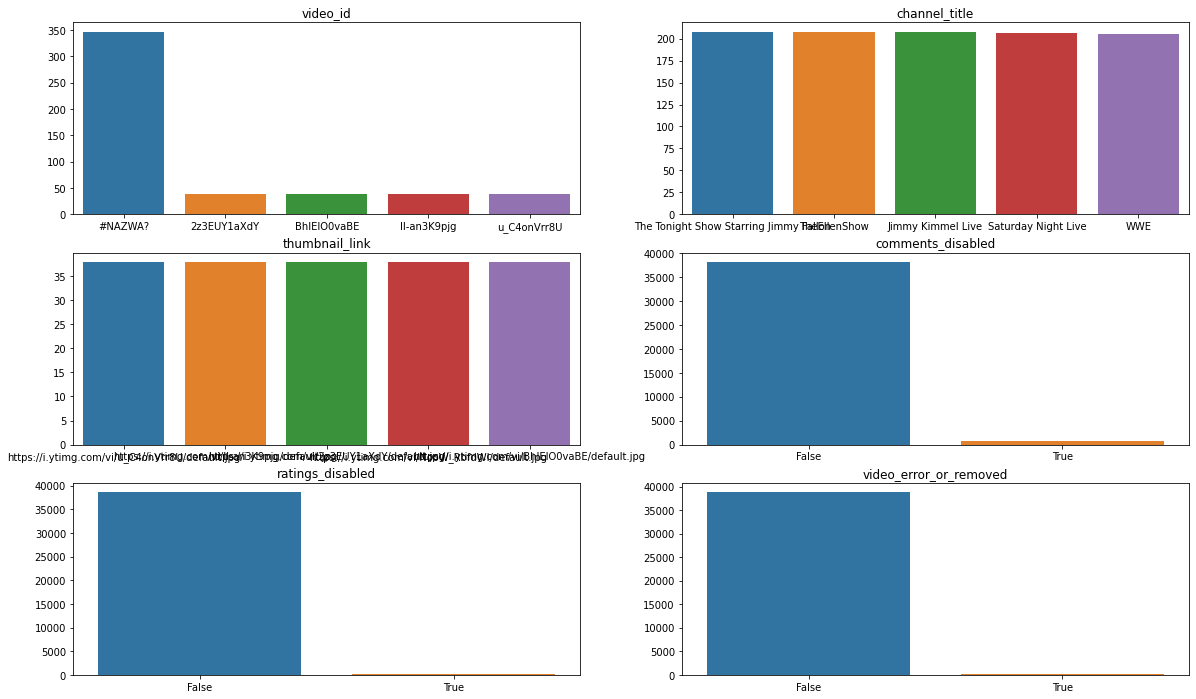

In [23]:
cols_to_check = ["video_id", "channel_title", "thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed"]

n_of_cols = 2
n_of_rows = int(len(cols_to_check)/n_of_cols)
fig, axes = plt.subplots(n_of_rows, n_of_cols, figsize=(n_of_cols*10, n_of_rows*4))

data = df.loc[:, cols_to_check]
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.set_title(cols_to_check[i*n_of_cols+j])
        dd = df.loc[:, cols_to_check[i*n_of_cols+j]].value_counts()[:5]
        sns.barplot(ax=ax, x=dd.index, y=dd.values)

In [35]:
for col in df.columns:
    print(f"{col}: ", df.loc[df[col] == "#NAZWA?", :].shape)

video_id:  (347, 17)
trending_date:  (0, 17)
title:  (0, 17)
channel_title:  (1, 17)
category_id:  (0, 17)
publish_time:  (0, 17)
tags:  (0, 17)
views:  (0, 17)
likes:  (0, 17)
dislikes:  (0, 17)
comment_count:  (0, 17)
thumbnail_link:  (0, 17)
comments_disabled:  (0, 17)
ratings_disabled:  (0, 17)
video_error_or_removed:  (0, 17)
description:  (0, 17)
region:  (0, 17)


In [36]:
df.loc[df["channel_title"] == "#NAZWA?"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
33107,qaSOyhK3gTM,18.10.05,GOTHAM - 4x18 JEROME VALESKA DEATH SCENE,#NAZWA?,NaN,2018-04-13T03:17:18.000Z,[none],1363377,8941,646,1469,https://i.ytimg.com/vi/qaSOyhK3gTM/default.jpg,False,False,False,4x18Watch in 1080p.Subscribe for more Gotham s...,GB


In [37]:
df = df.loc[df.video_id!="#NAZWA?", :]
df = df.loc[df.channel_title!="#NAZWA?", :]
print(df.shape)

(38568, 17)


## Dodanie nowych kolumn

In [49]:
from prepareCSV import addColumnsAndSaveCSV
# df = addColumnsAndSaveCSV(df, "./GB_new_columnsTEST.csv")
df = pd.read_csv("./GB_new_columns.csv")

In [5]:
df[:3]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region,pub_date,pub_day_of_the_week,pub_year,pub_month,pub_day,pub_hour,tren_date,tren_day_of_the_week,tren_year,tren_month,tren_day,time_to_trend_in_days,dislikes/likes,likes/views,dislikes/views,comment_count/views,increase_views,increase_likes,increase_dislikes,increase_comms,times_in_trend,avg_views,avg_likes,avg_dislikes,avg_comms,avg_views_increase_per_hour,n_of_tags,title_clean,title_length,title_n_of_words,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_clean,desc_length,desc_n_of_words,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_list_of_urls,desc_n_of_urls,desc_n_of_emojis,isFacebook,isTwitter,isInstagram
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"[""christmas"", ""john lewis christmas"", ""john le...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,2017-11-10 07:38:29,4.0,2017.0,11.0,10.0,7.0,2017-11-14 23:59:59,1.0,2017.0,11.0,14.0,4.681597,0.184030,0.007707,0.001418,0.001312,338739.0,2528.0,612.0,-2359.0,14.0,8.229008e+06,61558.357143,11834.857143,7919.785714,1.543173e+06,9,john lewis christmas ad 2017 mozthemonster,45,7,7,0.155556,26,0.577778,2,0.044444,0,click continue story make monsternhttpbitly2mb...,821,98,39,0.047503,608,0.740560,9,0.085262,"[""http://bit.ly/2mboXgj"", ""http://bit.ly/2hg04...",7,0,True,True,True
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"[""SNL"", ""Saturday Night Live"", ""SNL Season 43""...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GB,2017-11-12 06:24:44,6.0,2017.0,11.0,12.0,6.0,2017-11-14 23:59:59,1.0,2017.0,11.0,14.0,2.732813,0.089746,0.024260,0.002177,0.002617,615290.0,8211.0,783.0,715.0,3.0,1.499560e+06,31691.333333,2861.666667,3271.333333,3.855486e+05,36,taylor swift …ready live snl,41,8,8,0.195122,20,0.487805,5,0.121951,0,musical guest taylor swift performs …ready sat...,417,29,40,0.095923,276,0.661871,18,0.167866,"[""http://www.nbc.com/saturday"", ""http://www.nb...",7,0,True,True,True
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"[""Eminem"", ""Walk"", ""On"", ""Water"", ""Aftermath/S...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GB,2017-11-10 17:00:03,4.0,2017.0,11.0,10.0,17.0,2017-11-14 23:59:59,1.0,2017.0,11.0,14.0,4.291620,0.055142,0.045891,0.002531,0.007336,3380838.0,53222.0,4295.0,-1646.0,14.0,3.017875e+07,950319.000000,56545.571429,130640.500000,3.998159e+06,6,eminem walk water audio ft beyoncé,42,8,6,0.142857,25,0.595238,4,0.095238,0,eminems new track walk water ft beyoncé availa...,594,34,29,0.048822,433,0.728956,9,0.158249,"[""http://shady.sr/WOWEminem"", ""https://goo.gl/...",14,0,True,True,True


## Wizualizacja ciekawszych danych

In [13]:
print("Shape przed scaleniem filmmów i dodaniem kolumn:", shapeOld)
print("Shape po scaleniu filmów i dodaniu kolumn:", df.shape)

Shape przed scaleniem filmmów i dodaniem kolumn: (79865, 17)
Shape po scaleniu filmów i dodaniu kolumn: (8511, 70)


### Zakres czasu

In [14]:
tren_start = datetime.strptime(df["tren_date"].min(), '%Y-%m-%d %H:%M:%S')
tren_end = datetime.strptime(df["tren_date"].max(), '%Y-%m-%d %H:%M:%S')
print("Początek trending_date: ", tren_start)
print("Koniec trending_date: ", tren_end)
print("Zakres: ", tren_end-tren_start)
print("="*100)

pub_start = datetime.strptime(df["pub_date"].min(), '%Y-%m-%d %H:%M:%S')
pub_end = datetime.strptime(df["pub_date"].max(), '%Y-%m-%d %H:%M:%S')
print("Początek publish_date: ", pub_start)
print("Koniec publish_date: ", pub_end)
print("Zakres: ", pub_end-pub_start)


Początek trending_date:  2017-11-14 23:59:59
Koniec trending_date:  2018-06-14 23:59:59
Zakres:  212 days, 0:00:00
Początek publish_date:  2006-07-23 08:24:11
Koniec publish_date:  2018-06-14 01:31:53
Zakres:  4343 days, 17:07:42


### Liczba filmów miesiącami

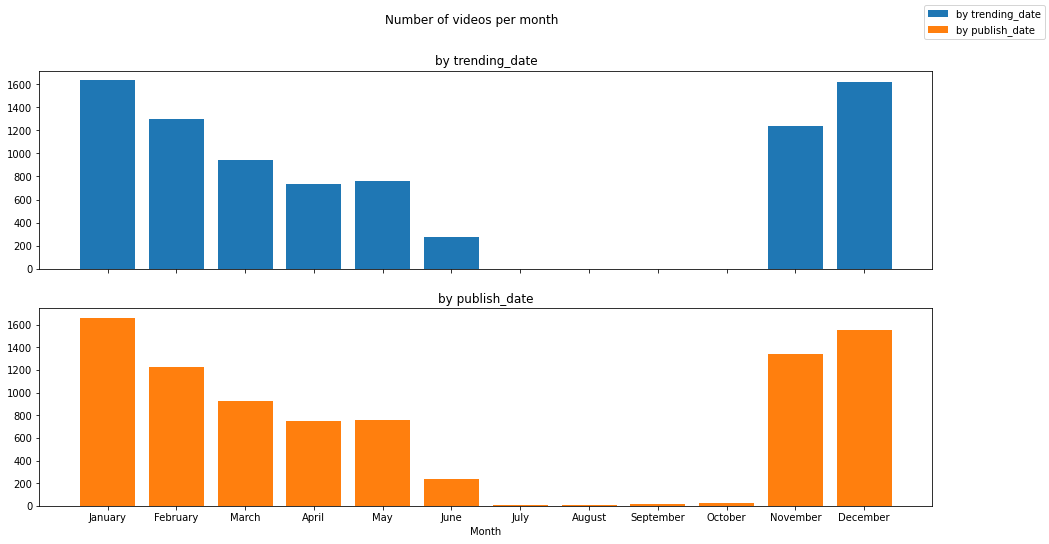

In [15]:
print("\n")
months_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 8), sharex=True)
fig.suptitle("Number of videos per month")

data = df['tren_month'].value_counts(sort=False).sort_index()
months = data.keys()
ax1.set_title("by trending_date")
ax1.bar(months, data, color='tab:blue', label="by trending_date")


data = df['pub_month'].value_counts(sort=False).sort_index()
months = data.keys()
ax2.set_title("by publish_date")
ax2.bar(months, data, color='tab:orange', label="by publish_date")
ax2.set_xlabel ('Month')

    
# fig.text(0.04, 0.5, 'Number of videos', va='center', rotation='vertical')
fig.legend()
plt.xticks(ticks=np.arange(1, 13, 1), labels=months_labels)
plt.show()

### Różne statystyki liczbowe

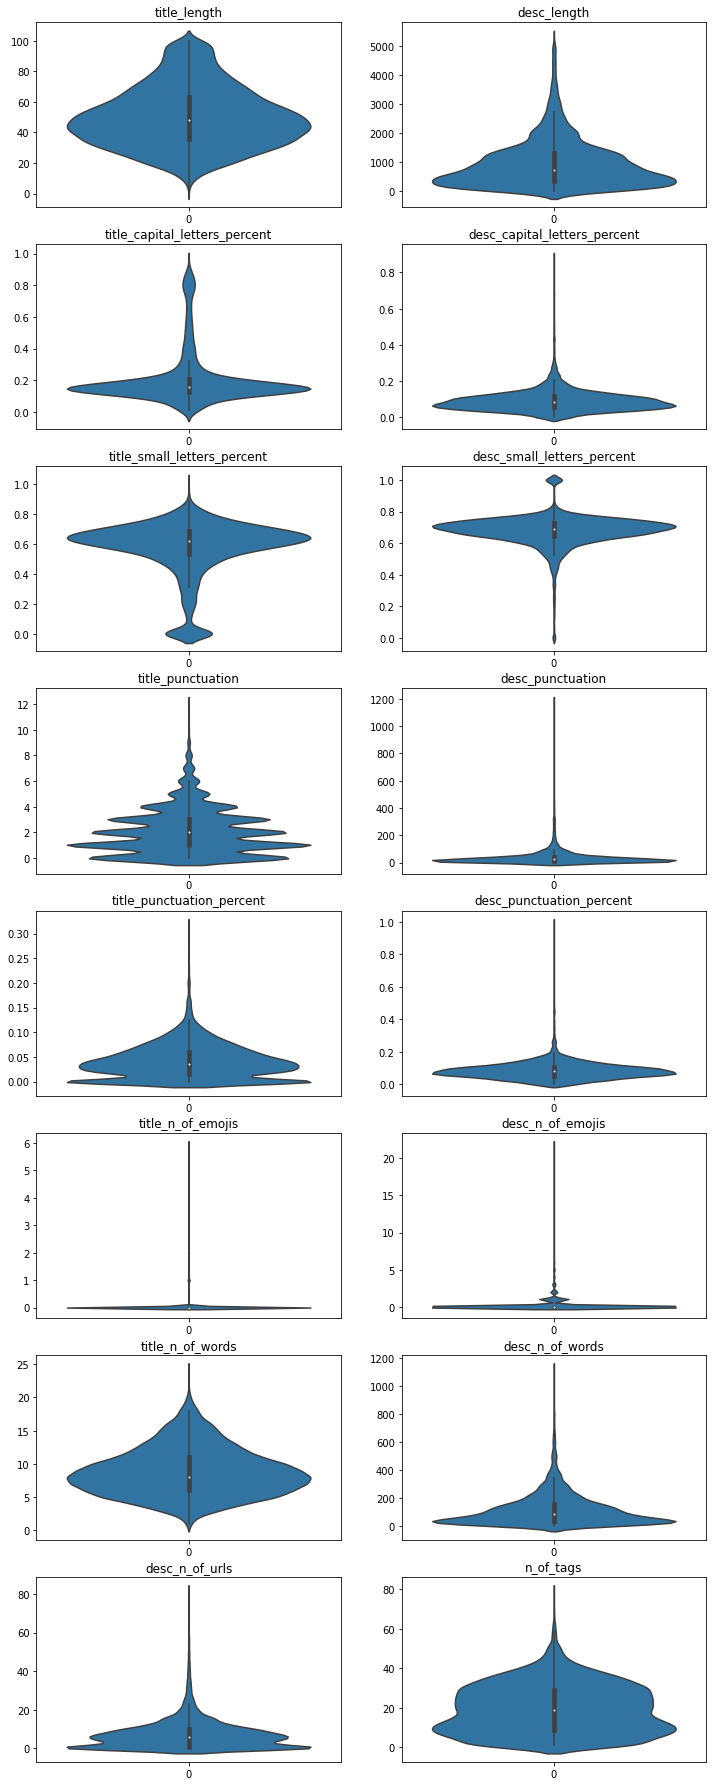

In [16]:
list_of_columns = [
    "title_length", "desc_length", 
#     "title_capital_letters", "desc_capital_letters", 
    "title_capital_letters_percent", "desc_capital_letters_percent", 
#     "title_small_letters", "desc_small_letters", 
    "title_small_letters_percent",  "desc_small_letters_percent", 
    "title_punctuation", "desc_punctuation",
    "title_punctuation_percent", "desc_punctuation_percent",
    "title_n_of_emojis", "desc_n_of_emojis",
    "title_n_of_words", "desc_n_of_words",
    "desc_n_of_urls",  "n_of_tags",
#     "likes", "dislikes",
#     "views", "comment_count"
                  ]
n_of_cols = 2
n_of_rows = int(len(list_of_columns)/n_of_cols)
fig, axes = plt.subplots(n_of_rows, n_of_cols, figsize=(n_of_cols*6, n_of_rows*4))

data = df.loc[:, list_of_columns]
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.set_title(list_of_columns[i*n_of_cols+j])
        sns.violinplot(ax=ax,data=df.loc[:, list_of_columns[i*n_of_cols+j]])

### Statystyki umieszczania linków do kont społecznościowych

<AxesSubplot:title={'center':'Instagram'}, xlabel='isInstagram', ylabel='count'>

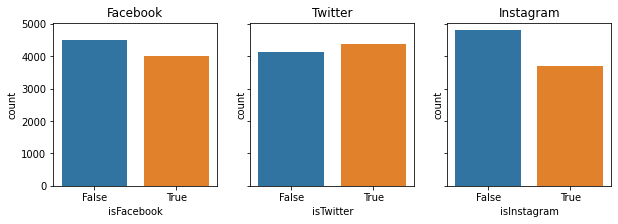

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

axes[0].set_title("Facebook")
sns.countplot(ax=axes[0], x="isFacebook", data=df)

axes[1].set_title("Twitter")
sns.countplot(ax=axes[1], x="isTwitter", data=df)

axes[2].set_title("Instagram")
sns.countplot(ax=axes[2], x="isInstagram", data=df)

### 20 najpopularniejszych słów w tagach

Text(0.5, 1.0, 'Najpopularniejsze tagi')

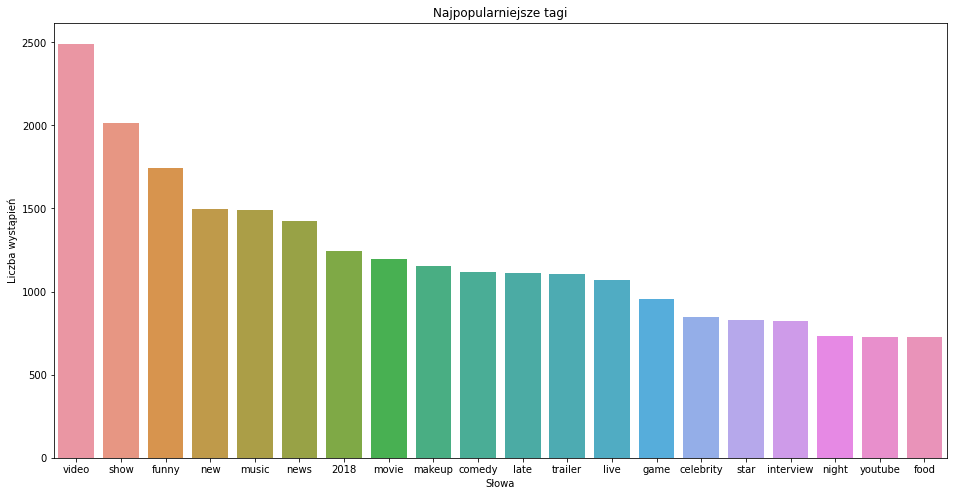

In [18]:
all_tags_words = []
for tags in df.loc[:,"tags"]:
    tags = json.loads(tags.lower())
    single_words = ' '.join(tags).split(' ')
    all_tags_words.extend(single_words)
    
all_words_without_stopwords = [word for word in all_tags_words if word not in stopwords.words('english')]

wnl = WordNetLemmatizer()
all_words_lemmatized = [wnl.lemmatize(word) for word in all_words_without_stopwords]


cnt_tags = Counter(all_words_lemmatized)
cnt_tags = cnt_tags.most_common()

xx, yy = zip(*cnt_tags[:20])
plt.figure(figsize=(16,8))
sns.barplot(x=list(xx),y=list(yy))
plt.xlabel("Słowa")
plt.ylabel("Liczba wystąpień")
plt.title("Najpopularniejsze tagi")

### 20 najpopularniejszych słów w tytułach

Text(0.5, 1.0, 'Najpopularniejsze słowa w tytułach')

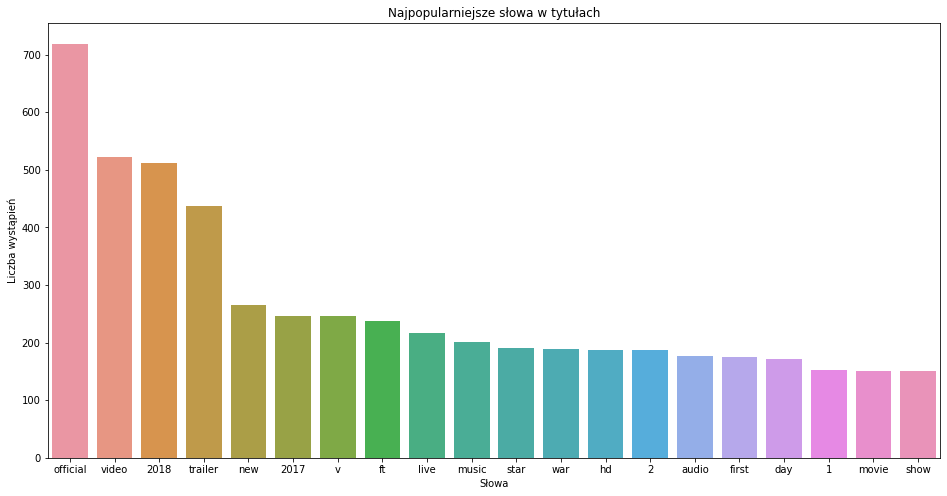

In [20]:
all_words_title = []
for title in df.loc[:,"title_clean"]:
    single_words = str(title).split(' ')
    all_words_title.extend(single_words)
    
cnt_title = Counter(all_words_title)
cnt_title = cnt_title.most_common()

xx, yy = zip(*cnt_title[:20])
plt.figure(figsize=(16,8))
sns.barplot(x=list(xx),y=list(yy))
plt.xlabel("Słowa")
plt.ylabel("Liczba wystąpień")
plt.title("Najpopularniejsze słowa w tytułach")

### Opis podstawowych statystyk dla filmów.
#### W statystyce znajdują się tylko pierwsze wystapienia filmu w liście trending 

,views,likes,dislikes,comment_count
count,8.511000e+03,8.511000e+03,8511.000000,8511.000000
mean,8.532400e+05,3.510220e+04,1433.996240,4321.517566
std,2.871308e+06,1.148402e+05,10868.021228,19332.913869
min,5.490000e+02,1.000000e+00,1.000000,1.000000
25%,7.851700e+04,1.873000e+03,66.000000,256.500000
50%,2.529580e+05,7.305000e+03,223.000000,877.000000
75%,7.462935e+05,2.465050e+04,753.000000,2822.500000
max,1.434082e+08,3.880074e+06,629123.000000,733371.000000


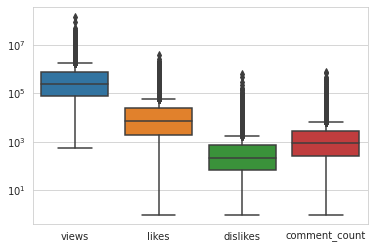

In [21]:
display(df.describe()[['views','likes','dislikes','comment_count']])

sns.set_style("whitegrid")
data = df[['views','likes','dislikes','comment_count']]
ax = sns.boxplot(data=data)
ax.set(yscale="log")
plt.show()

### Proporcje podstawowych statystyk.
#### W statystyce znajdują się tylko pierwsze wystapienia filmu w liście trending 

,dislikes/likes,likes/views,dislikes/views,comment_count/views
count,8511.000000,8.511000e+03,8.511000e+03,8.511000e+03
mean,0.117539,4.038739e-02,1.717411e-03,5.738950e-03
std,0.653514,3.513239e-02,4.492040e-03,7.001367e-03
min,0.000576,4.779704e-08,4.779704e-08,4.096206e-08
25%,0.014729,1.431155e-02,5.004004e-04,1.834752e-03
50%,0.030251,3.123913e-02,8.808122e-04,3.757032e-03
75%,0.071260,5.573426e-02,1.625712e-03,6.921055e-03
max,27.931818,2.956704e-01,2.155757e-01,1.176430e-01


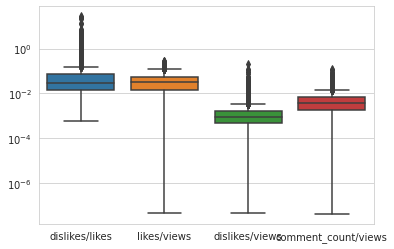

In [26]:
display(df.describe()[['dislikes/likes','likes/views','dislikes/views','comment_count/views']])

sns.set_style("whitegrid")
data = df[['dislikes/likes','likes/views','dislikes/views','comment_count/views']]
ax = sns.boxplot( data=data)
ax.set(yscale="log")
plt.show()

### Wzrost podstawowych statysyk po pierwszym wystąpieniu w trending 
#### Rozważamy filmy  które wystąpiły ponownie w trending

,increase_views,increase_likes,increase_dislikes,increase_comms
count,8.511000e+03,8.511000e+03,8511.000000,8511.000000
mean,2.791773e+05,6.725584e+03,538.730584,790.701680
std,1.882972e+06,4.040525e+04,7170.899533,6281.451085
min,-1.429083e+08,-2.550877e+06,-134410.000000,-132123.000000
25%,8.231500e+03,9.900000e+01,5.000000,7.000000
50%,5.949200e+04,8.960000e+02,53.000000,94.000000
75%,2.182105e+05,4.032000e+03,239.000000,424.000000
max,2.782687e+07,7.663000e+05,436649.000000,326280.000000


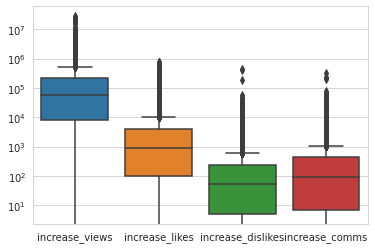

In [27]:
sns.set_style("whitegrid")
display(df.describe()[['increase_views','increase_likes','increase_dislikes','increase_comms']])

data = df[['increase_views','increase_likes','increase_dislikes','increase_comms']]
ax = sns.boxplot( data=data)
ax.set(yscale="log")
plt.show()


### Czas od publikacji do pierwszego wystąpienia w trending


,time_to_trend_in_days
count,8511.000000
mean,30.482535
std,244.241731
min,0.327847
25%,1.499965
50%,2.193079
75%,3.389884
max,4215.649861


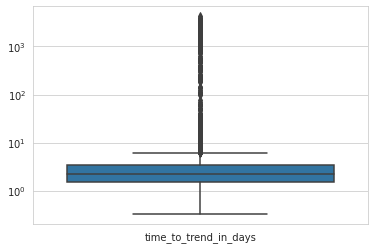

In [29]:
display(df.describe()[['time_to_trend_in_days']])

sns.set_style("whitegrid")
data = df[['time_to_trend_in_days']]
ax = sns.boxplot( data=data)
ax.set(yscale="log")
plt.show()

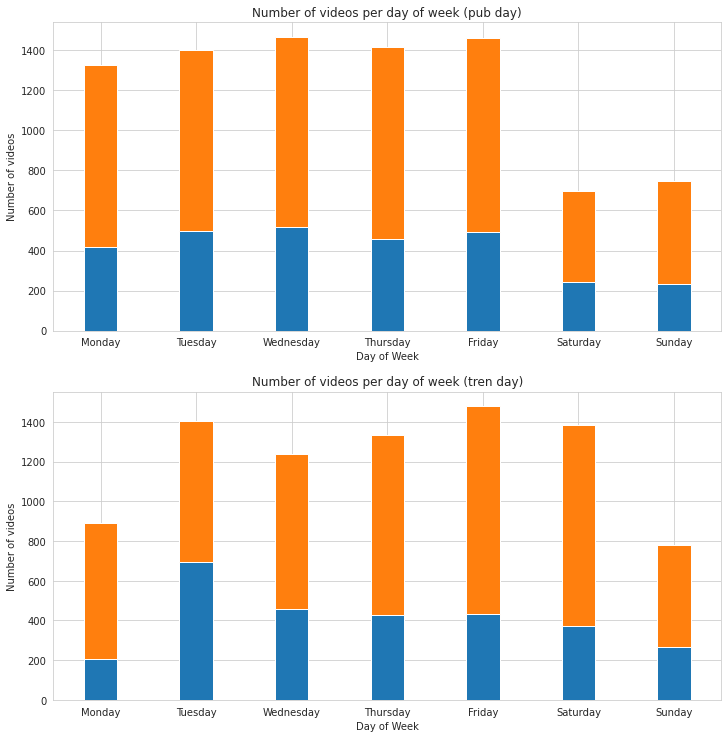

In [38]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data17 = df[df["tren_year"]==2017]['pub_day_of_the_week'].value_counts(sort=False)[df["pub_day_of_the_week"].unique()]
data18 = df[df["tren_year"]==2018]['pub_day_of_the_week'].value_counts(sort=False)[df["pub_day_of_the_week"].unique()]

days = data17.keys()#[0,6,4,5,3,1,2]


fig, ax = plt.subplots(2,1,figsize=(10,10))
fig.tight_layout(h_pad=4)
ax[0].bar(days,data17,0.35,label="2017")
ax[0].bar(days,data18,0.35,bottom=data17,label="2018")
ax[0].set_xlabel ('Day of Week')
ax[0].set_ylabel ('Number of videos')
ax[0].set_title("Number of videos per day of week (pub day)")
ax[0].set_xticks([0,1,2,3,4,5,6])
ax[0].set_xticklabels(labels)

data17 = df[df["tren_year"]==2017]['tren_day_of_the_week'].value_counts(sort=False)[df["tren_day_of_the_week"].unique()]
data18 = df[df["tren_year"]==2018]['tren_day_of_the_week'].value_counts(sort=False)[df["tren_day_of_the_week"].unique()]

days = data17.keys()

ax[1].bar(days,data17,0.35,label="2017")
ax[1].bar(days,data18,0.35,bottom=data17,label="2018")
ax[1].set_xlabel ('Day of Week')
ax[1].set_ylabel ('Number of videos')
ax[1].set_title("Number of videos per day of week (tren day)")
ax[1].set_xticks([0,1,2,3,4,5,6])
ax[1].set_xticklabels(labels)
plt.show()